In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Seed fixe pour reproductibilité
np.random.seed(42)

# Générer 100 points entre 0 et 10
x = np.linspace(0, 10, 100)

# Générer y = 2.5*x + bruit gaussien
y = 2.5 * x + np.random.normal(scale=1.0, size=x.shape)

# Sauvegarder dans un fichier CSV avec header
data = np.column_stack((x, y))
np.savetxt("data_reg_lin.csv", data, delimiter=",", header="x,y", comments='')

print("Dataset sauvegardé dans data_reg_lin.csv")


Dataset sauvegardé dans data_reg_lin.csv


In [3]:
print("Lancement du binaire Rust d'entraînement...")
result = subprocess.run(
    ["cargo", "run", "--bin", "train_linear_regression", "--", "data_reg_lin.csv"],
    capture_output=True, text=True, check=True
)

print("Sortie du binaire :")
print(result.stdout)


Lancement du binaire Rust d'entraînement...
Sortie du binaire :
Poids sauvegardÃ©s dans weights.txt : -0.17281285407732128,2.5137932673366477



In [4]:
with open("weights.txt", "r") as f:
    weights_str = f.read().strip()

weights = [float(w) for w in weights_str.split(",")]
print(f"Poids appris par le modèle : {weights}")


Poids appris par le modèle : [-0.17281285407732128, 2.5137932673366477]


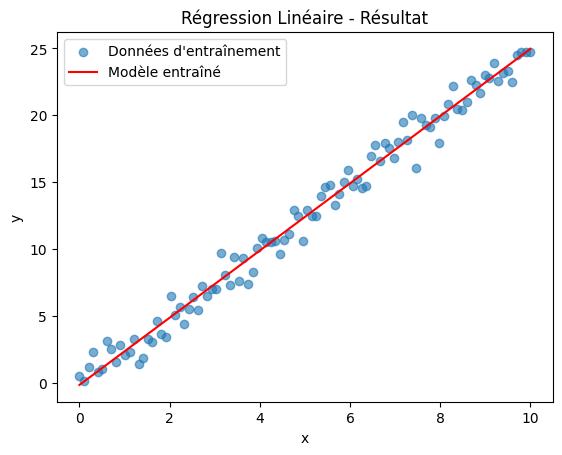

In [5]:
plt.scatter(x, y, label="Données d'entraînement", alpha=0.6)
x_line = np.linspace(0, 10, 100)
y_line = weights[0] + weights[1] * x_line  # biais + poids * x
plt.plot(x_line, y_line, color="red", label="Modèle entraîné")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression Linéaire - Résultat")
plt.legend()
plt.show()
